# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [2]:
df = pd.read_csv("MODULO7_BASE_SUPERMERCADO.csv", delimiter=',')

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [3]:
media_por_categoria = df.groupby('Categoria')['Preco_Normal'].mean().reset_index()
media_por_categoria = media_por_categoria.sort_values(by='Preco_Normal', ascending=False)

print("Média de preços por categoria:", media_por_categoria)

Média de preços por categoria:                     Categoria  Preco_Normal
1          comidas-preparadas   3095.043478
5                     lacteos   2385.219239
2                  congelados   2108.042553
0  belleza-y-cuidado-personal   1783.556485
3                      frutas   1724.473684
6                    verduras   1343.296875
4        instantaneos-y-sopas    765.491228


In [4]:
mediana_geral_categoria = media_por_categoria['Preco_Normal'].median()
print('Mediana geral é: ', mediana_geral_categoria)

Mediana geral é:  1783.5564853556486


Digite aqui as categorias:

**Abaixo:**

instantaneos-y-sopas,
verduras,
fruta,
belleza-y-cuidado-personal.

**Acima:**
congelados,
lacteos,
comidas-preparadas.


# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [5]:
desvio_padrao_categoria = df.groupby('Categoria')['Preco_Normal'].std().reset_index()
print('Desvio padrão é: ',desvio_padrao_categoria)

Desvio padrão é:                      Categoria  Preco_Normal
0  belleza-y-cuidado-personal   2210.041719
1          comidas-preparadas   2019.911428
2                  congelados   2111.539896
3                      frutas   1639.151114
4        instantaneos-y-sopas   1170.232869
5                     lacteos   3925.816164
6                    verduras   1012.699625


Digite nesse campo o comportamento que você identificou.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

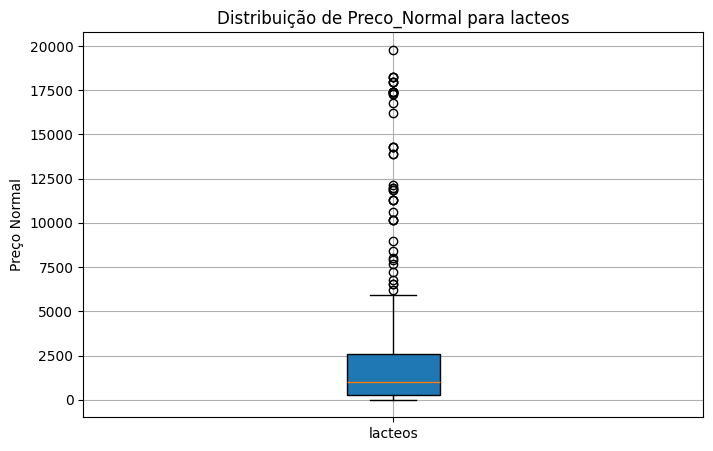

In [6]:
categoria_maior_dp = desvio_padrao_categoria.loc[desvio_padrao_categoria['Preco_Normal'].idxmax(), 'Categoria']
df_filtrado = df[df['Categoria'] == categoria_maior_dp]
plt.figure(figsize=(8, 5))
plt.boxplot(df_filtrado['Preco_Normal'], vert=True, patch_artist=True)
plt.title(f'Distribuição de Preco_Normal para {categoria_maior_dp}')
plt.ylabel('Preço Normal')
plt.xticks([1], [categoria_maior_dp])
plt.grid(True)

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.


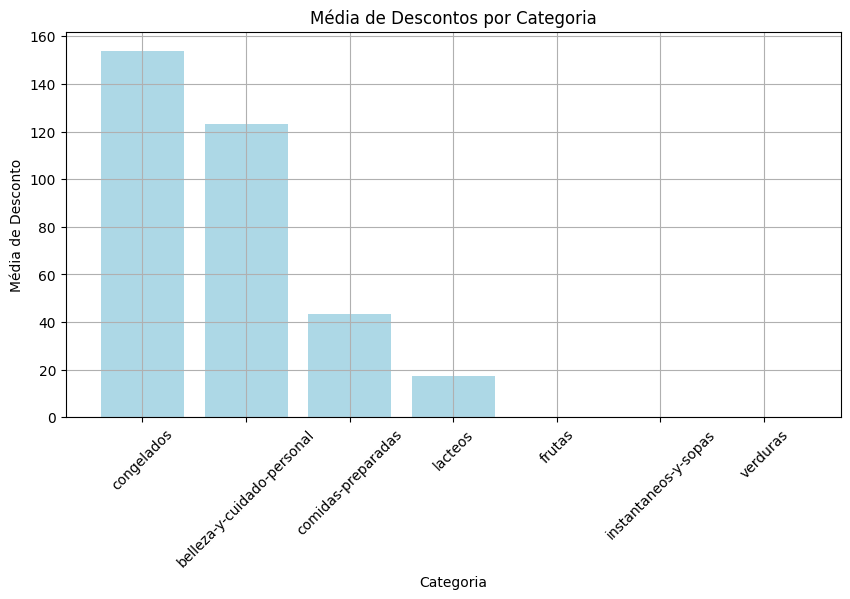

In [7]:
media_desconto_categoria = df.groupby('Categoria')['Desconto'].mean().reset_index()
media_desconto_categoria = media_desconto_categoria.sort_values(by='Desconto', ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(media_desconto_categoria['Categoria'], media_desconto_categoria['Desconto'], color='lightblue')
plt.xlabel('Categoria')
plt.ylabel('Média de Desconto')
plt.title('Média de Descontos por Categoria')
plt.xticks(rotation=45)
plt.grid(True)

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [8]:
media_desconto = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()
fig = px.scatter(
    media_desconto,
    x='Categoria',
    y='Marca',
    color='Desconto',
    size='Desconto',
    hover_name='Marca',
    hover_data=['Categoria', 'Desconto'],
    title="Distribuição da Média de Descontos por Categoria e Marca",
    color_continuous_scale=px.colors.sequential.Viridis,
    size_max=20
)
fig.update_layout(
    xaxis_title="Categoria",
    yaxis_title="Marca",
    xaxis_tickangle=-45
)
fig.show()